***

***task1***

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
%matplotlib inline
from warnings import filterwarnings
filterwarnings("ignore")


In [2]:
df=pd.read_csv(r"TSLA.csv")
print("your data imported successfully")
df.head()

your data imported successfully


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [3]:
df.shape


(2416, 7)

***Gathering information about the data present in csv***

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.3+ KB


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [6]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [7]:
df=df.reset_index()['Close']

In [8]:
df

0        23.889999
1        23.830000
2        21.959999
3        19.200001
4        16.110001
           ...    
2411    566.900024
2412    580.989990
2413    640.809998
2414    650.570007
2415    780.000000
Name: Close, Length: 2416, dtype: float64

In [9]:
df.isnull().sum()
df

0        23.889999
1        23.830000
2        21.959999
3        19.200001
4        16.110001
           ...    
2411    566.900024
2412    580.989990
2413    640.809998
2414    650.570007
2415    780.000000
Name: Close, Length: 2416, dtype: float64

***Preprocessing***

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [11]:
df

array([[0.01058623],
       [0.01050772],
       [0.00806072],
       ...,
       [0.81786181],
       [0.83063335],
       [1.        ]])

***Defining time step and creating training and test datasets according to time step***


In [12]:
training_size =int(len(df)*0.75)
test_sizes=int(len(df))-training_size
train_data, test_data =df[0:training_size,:],df[training_size:len(df),:1]

In [13]:
training_size,test_sizes

(1812, 604)

In [14]:
train_data,test_data

(array([[0.01058623],
        [0.01050772],
        [0.00806072],
        ...,
        [0.43678356],
        [0.43016226],
        [0.43811827]]),
 array([[0.42868358],
        [0.45523423],
        [0.45400419],
        [0.45855798],
        [0.47348864],
        [0.47632818],
        [0.4831196 ],
        [0.47016489],
        [0.4686077 ],
        [0.45888512],
        [0.4387464 ],
        [0.43076418],
        [0.43110442],
        [0.4255038 ],
        [0.42371108],
        [0.42567392],
        [0.42623659],
        [0.43488618],
        [0.44387596],
        [0.44429467],
        [0.44632296],
        [0.42808166],
        [0.44463491],
        [0.44333945],
        [0.44475267],
        [0.44460875],
        [0.43810522],
        [0.44484428],
        [0.44994765],
        [0.43968856],
        [0.43090815],
        [0.42033498],
        [0.42075372],
        [0.40570531],
        [0.40613715],
        [0.39920177],
        [0.398168  ],
        [0.41315101],
        [0.399476

***converting an array value into a dataset matrix***


In [15]:
def create_features(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

***Rehape int X=t,t+1,t+2,t+3 and y=t+4***


In [16]:
ts = 100
X_train, y_train = create_features(train_data, ts)
X_test, y_test = create_features(test_data, ts)

In [17]:
print(X_train.shape), print(y_train.shape)

(1711, 100)
(1711,)


(None, None)

In [18]:
X_train=X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test=X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

***creating model***

In [19]:
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
27/27 [==============================] - 12s 185ms/step - loss: 0.0111 - val_loss: 0.0045
Epoch 2/100
27/27 [==============================] - 4s 151ms/step - loss: 7.4449e-04 - val_loss: 0.0016
Epoch 3/100
27/27 [==============================] - 4s 157ms/step - loss: 3.3270e-04 - val_loss: 0.0015
Epoch 4/100
27/27 [==============================] - 4s 158ms/step - loss: 3.0491e-04 - val_loss: 0.0015
Epoch 5/100
27/27 [==============================] - 4s 153ms/step - loss: 2.9756e-04 - val_loss: 0.0017
Epoch 6/100
27/27 [==============================] - 4s 153ms/step - loss: 3.0152e-04 - val_loss: 0.0015
Epoch 7/100
27/27 [==============================] - 4s 152ms/step - loss: 2.8750e-04 - val_loss: 0.0015
Epoch 8/100
27/27 [==============================] - 4s 152ms/step - loss: 2.6536e-04 - val_loss: 0.0015
Epoch 9/100
27/27 [==============================] - 4s 154ms/step - loss: 2.6415e-04 - val_loss: 0.0015
Epoch 10/100
27/27 [==============================] - 4s 1

27/27 [==============================] - 4s 152ms/step - loss: 6.6798e-05 - val_loss: 2.8976e-04
Epoch 77/100
27/27 [==============================] - 4s 153ms/step - loss: 7.6354e-05 - val_loss: 2.3252e-04
Epoch 78/100
27/27 [==============================] - 4s 154ms/step - loss: 5.4092e-05 - val_loss: 2.9144e-04
Epoch 79/100
27/27 [==============================] - 4s 153ms/step - loss: 5.5770e-05 - val_loss: 2.2045e-04
Epoch 80/100
27/27 [==============================] - 4s 153ms/step - loss: 6.0434e-05 - val_loss: 2.2857e-04
Epoch 81/100
27/27 [==============================] - 4s 152ms/step - loss: 5.3014e-05 - val_loss: 2.2842e-04
Epoch 82/100
27/27 [==============================] - 4s 153ms/step - loss: 5.8158e-05 - val_loss: 2.1827e-04
Epoch 83/100
27/27 [==============================] - 4s 152ms/step - loss: 5.1471e-05 - val_loss: 2.0959e-04
Epoch 84/100
27/27 [==============================] - 4s 153ms/step - loss: 5.0876e-05 - val_loss: 2.2945e-04
Epoch 85/100
27/27 [===

***checking performance metrics and predicting***

In [22]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [23]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

***calculate rmse***

In [24]:
math.sqrt(mean_squared_error(y_train,train_predict))

184.19966274024546

In [25]:
math.sqrt(mean_squared_error(y_test,test_predict))

311.0635256133847

***plot the graph according to train and test data***

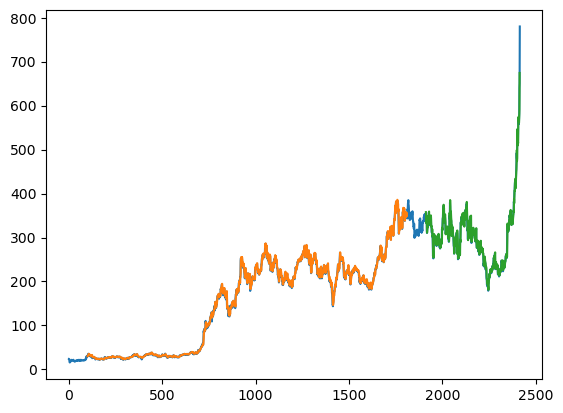

In [26]:
look_back=100
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict

plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [27]:
len(test_data)

604

In [28]:
x_input=test_data[504:].reshape(1,-1)
x_input.shape

(1, 100)

In [29]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.3026694661083486,
 0.30105992541219573,
 0.3001831941900026,
 0.2970557419523685,
 0.2996466801884323,
 0.2979455705312745,
 0.30201518712378955,
 0.29418999607432605,
 0.29498821774404604,
 0.27140801753467675,
 0.27859198769955507,
 0.296728602460089,
 0.296165931693274,
 0.2945171355666056,
 0.2995158361685422,
 0.29747448966239204,
 0.2842580463229521,
 0.2821643457210154,
 0.2903951858152316,
 0.29344412850039253,
 0.29930646296780944,
 0.29958126799267204,
 0.303703217744046,
 0.31557182805548284,
 0.3167888183721539,
 0.3192227165663439,
 0.3221277165663439,
 0.315558769955509,
 0.31104422925935615,
 0.3137660324522376,
 0.31258831850300967,
 0.37147342711332115,
 0.4087019170374247,
 0.4081523043705836,
 0.3931169863909971,
 0.391533643025386,
 0.39141587673383926,
 0.3893090787751897,
 0.39475268385239465,
 0.3944255443601152,
 0.40667362863124834,
 0.41839833682282124,
 0.4204920374247579,
 0.43089504841664483,
 0.43722846506150226,
 0.4322297631510076,
 0.4364695184506673

***predicting value for next 30 days***

In [30]:
lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))

        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]

        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[1.0953293]
101
1 day input [0.30105993 0.30018319 0.29705574 0.29964668 0.29794557 0.30201519
 0.29419    0.29498822 0.27140802 0.27859199 0.2967286  0.29616593
 0.29451714 0.29951584 0.29747449 0.28425805 0.28216435 0.29039519
 0.29344413 0.29930646 0.29958127 0.30370322 0.31557183 0.31678882
 0.31922272 0.32212772 0.31555877 0.31104423 0.31376603 0.31258832
 0.37147343 0.40870192 0.4081523  0.39311699 0.39153364 0.39141588
 0.38930908 0.39475268 0.39442554 0.40667363 0.41839834 0.42049204
 0.43089505 0.43722847 0.43222976 0.43646952 0.44015966 0.43730697
 0.44977753 0.44022507 0.44364039 0.41512694 0.41944517 0.40973569
 0.41283697 0.4110704  0.41752158 0.41926199 0.41511384 0.41163307
 0.41885634 0.42361947 0.43580214 0.4408532  0.44998691 0.44829889
 0.47853965 0.47525516 0.49378434 0.50803456 0.51006281 0.52789846
 0.53578906 0.54323476 0.54250197 0.52198379 0.52673382 0.54234495
 0.55902906 0.57019106 0.59311698 0.62331852 0.60918607 0.60501177
 0.6661345  0.68322426 0.65781209 

8 day output [[1.1150185]]
9 day input [0.27140802 0.27859199 0.2967286  0.29616593 0.29451714 0.29951584
 0.29747449 0.28425805 0.28216435 0.29039519 0.29344413 0.29930646
 0.29958127 0.30370322 0.31557183 0.31678882 0.31922272 0.32212772
 0.31555877 0.31104423 0.31376603 0.31258832 0.37147343 0.40870192
 0.4081523  0.39311699 0.39153364 0.39141588 0.38930908 0.39475268
 0.39442554 0.40667363 0.41839834 0.42049204 0.43089505 0.43722847
 0.43222976 0.43646952 0.44015966 0.43730697 0.44977753 0.44022507
 0.44364039 0.41512694 0.41944517 0.40973569 0.41283697 0.4110704
 0.41752158 0.41926199 0.41511384 0.41163307 0.41885634 0.42361947
 0.43580214 0.4408532  0.44998691 0.44829889 0.47853965 0.47525516
 0.49378434 0.50803456 0.51006281 0.52789846 0.53578906 0.54323476
 0.54250197 0.52198379 0.52673382 0.54234495 0.55902906 0.57019106
 0.59311698 0.62331852 0.60918607 0.60501177 0.6661345  0.68322426
 0.65781209 0.6512562  0.64734363 0.69536772 0.72462706 0.72808167
 0.71842451 0.70952633 0

18 day output [[1.2457219]]
19 day input [0.29344413 0.29930646 0.29958127 0.30370322 0.31557183 0.31678882
 0.31922272 0.32212772 0.31555877 0.31104423 0.31376603 0.31258832
 0.37147343 0.40870192 0.4081523  0.39311699 0.39153364 0.39141588
 0.38930908 0.39475268 0.39442554 0.40667363 0.41839834 0.42049204
 0.43089505 0.43722847 0.43222976 0.43646952 0.44015966 0.43730697
 0.44977753 0.44022507 0.44364039 0.41512694 0.41944517 0.40973569
 0.41283697 0.4110704  0.41752158 0.41926199 0.41511384 0.41163307
 0.41885634 0.42361947 0.43580214 0.4408532  0.44998691 0.44829889
 0.47853965 0.47525516 0.49378434 0.50803456 0.51006281 0.52789846
 0.53578906 0.54323476 0.54250197 0.52198379 0.52673382 0.54234495
 0.55902906 0.57019106 0.59311698 0.62331852 0.60918607 0.60501177
 0.6661345  0.68322426 0.65781209 0.6512562  0.64734363 0.69536772
 0.72462706 0.72808167 0.71842451 0.70952633 0.72114633 0.73958387
 0.81786181 0.83063335 1.         1.09532928 1.06956077 1.02052188
 1.00676596 1.0307186

26 day output [[1.3480327]]
27 day input [0.31555877 0.31104423 0.31376603 0.31258832 0.37147343 0.40870192
 0.4081523  0.39311699 0.39153364 0.39141588 0.38930908 0.39475268
 0.39442554 0.40667363 0.41839834 0.42049204 0.43089505 0.43722847
 0.43222976 0.43646952 0.44015966 0.43730697 0.44977753 0.44022507
 0.44364039 0.41512694 0.41944517 0.40973569 0.41283697 0.4110704
 0.41752158 0.41926199 0.41511384 0.41163307 0.41885634 0.42361947
 0.43580214 0.4408532  0.44998691 0.44829889 0.47853965 0.47525516
 0.49378434 0.50803456 0.51006281 0.52789846 0.53578906 0.54323476
 0.54250197 0.52198379 0.52673382 0.54234495 0.55902906 0.57019106
 0.59311698 0.62331852 0.60918607 0.60501177 0.6661345  0.68322426
 0.65781209 0.6512562  0.64734363 0.69536772 0.72462706 0.72808167
 0.71842451 0.70952633 0.72114633 0.73958387 0.81786181 0.83063335
 1.         1.09532928 1.06956077 1.02052188 1.00676596 1.03071868
 1.06437635 1.08924973 1.10410166 1.11501849 1.12627614 1.13841724
 1.15049434 1.163311  

In [31]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [32]:
len(df)

2416

***actual value graph in last 100 days***

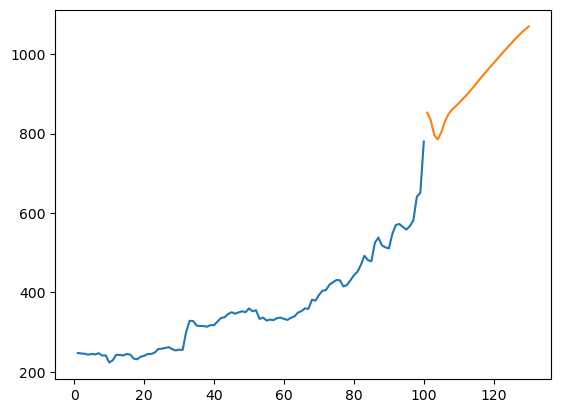

In [33]:
plt.plot(day_new,scaler.inverse_transform(df[2316:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

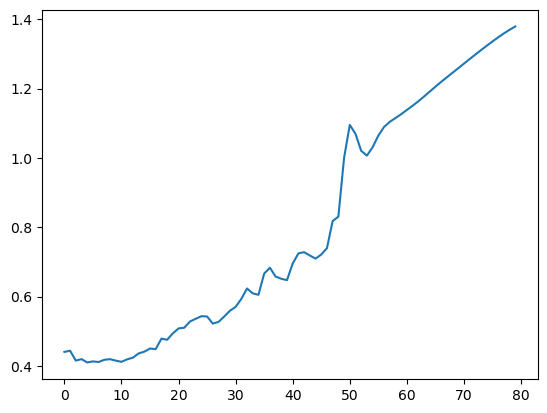

In [34]:
df1=df.tolist()
df1.extend(lst_output)
plt.plot(df1[2366:])

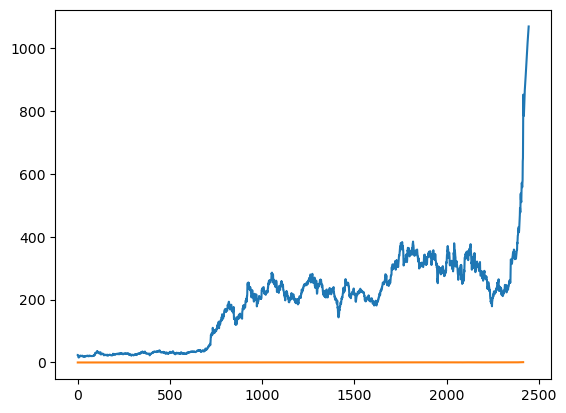

In [35]:
df1=scaler.inverse_transform(df1).tolist()
plt.plot(df1)
plt.plot(df)